In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/happiness-index-2018-2019/report_2018-2019.csv
/kaggle/input/happiness-index-2018-2019/2019.csv
/kaggle/input/happiness-index-2018-2019/2018.csv


In [2]:
report_1 = pd.read_csv("/kaggle/input/happiness-index-2018-2019/2018.csv")
report_1.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [3]:
report_2 = pd.read_csv("/kaggle/input/happiness-index-2018-2019/2019.csv")
report_2.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
for col in report_1:
    if report_1[col].dtype == 'object':
        report_1[col] = report_1[col].factorize()[0]

In [5]:
for col in report_2:
    if report_2[col].dtype == 'object':
        report_2[col] = report_2[col].factorize()[0]

array([[<Axes: title={'center': 'Overall rank'}>,
        <Axes: title={'center': 'Country or region'}>,
        <Axes: title={'center': 'Score'}>],
       [<Axes: title={'center': 'GDP per capita'}>,
        <Axes: title={'center': 'Social support'}>,
        <Axes: title={'center': 'Healthy life expectancy'}>],
       [<Axes: title={'center': 'Freedom to make life choices'}>,
        <Axes: title={'center': 'Generosity'}>,
        <Axes: title={'center': 'Perceptions of corruption'}>]],
      dtype=object)

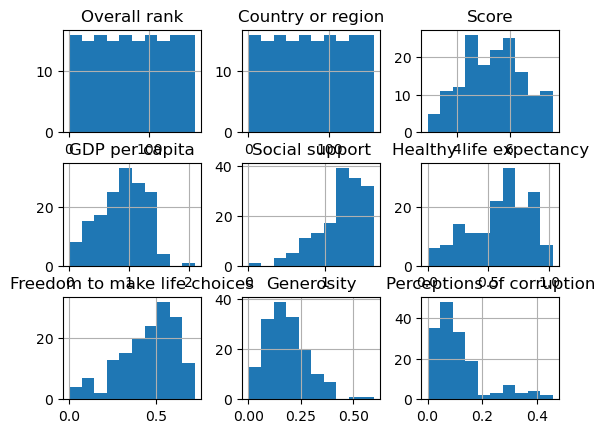

In [6]:
report_1.hist()

array([[<Axes: title={'center': 'Overall rank'}>,
        <Axes: title={'center': 'Country or region'}>,
        <Axes: title={'center': 'Score'}>],
       [<Axes: title={'center': 'GDP per capita'}>,
        <Axes: title={'center': 'Social support'}>,
        <Axes: title={'center': 'Healthy life expectancy'}>],
       [<Axes: title={'center': 'Freedom to make life choices'}>,
        <Axes: title={'center': 'Generosity'}>,
        <Axes: title={'center': 'Perceptions of corruption'}>]],
      dtype=object)

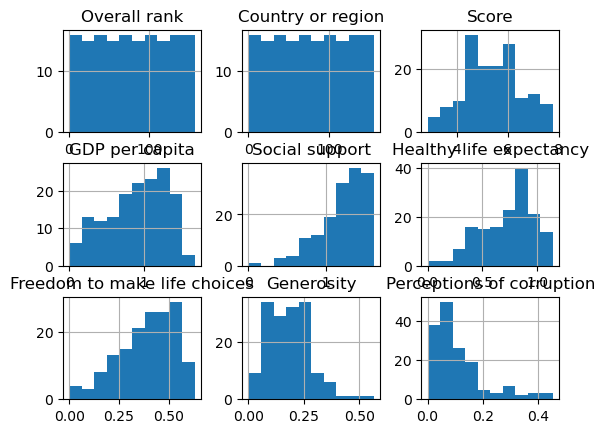

In [7]:
report_2.hist()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(report_1.loc[:,report_1.columns != 'Score'], report_1['Score'], test_size=0.3)

In [9]:
from sklearn.linear_model import LinearRegression
from math import sqrt

reg = LinearRegression().fit(X_train, y_train)

preds = reg.predict(X_test)

RMSE = 0

for i, entry in enumerate(preds):
#     print(entry, y_test.iloc[i])
    RMSE += abs(entry - y_test.iloc[i])**2
    
RMSE = sqrt(RMSE / len(preds))

print(RMSE)

0.12147163255168225


In [10]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

preds = clf.predict(X_test)

RMSE = 0

for i, entry in enumerate(preds):
#     print(entry, y_test.iloc[i])
    RMSE += abs(entry - y_test.iloc[i])**2
    
RMSE = sqrt(RMSE / len(preds))

print(RMSE)

0.09313259821922631


In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

preds = model.predict(X_test)

RMSE = 0

for i, entry in enumerate(preds):
#     print(entry, y_test.iloc[i])
    RMSE += abs(entry - y_test.iloc[i])**2
    
RMSE = sqrt(RMSE / len(preds))

print(RMSE)

0.036560356858447184


In [12]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

preds = model.predict(X_test)

RMSE = 0

for i, entry in enumerate(preds):
#     print(entry, y_test.iloc[i])
    RMSE += abs(entry - y_test.iloc[i])**2
    
RMSE = sqrt(RMSE / len(preds))

print(RMSE)

0.0384204548456575
